<a href="https://colab.research.google.com/github/PiyushMankad/TCD-Computer-Vision/blob/master/CV_Question2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## upload composite image
from google.colab import files
composite = files.upload()

## Please upload "composite.png" image

In [46]:
# -*- coding: utf-8 -*-
"""
Created on Wed Oct 23 17:23:48 2019

@author: mankadp
"""

import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

X = np.vstack((x_train,x_test))
Y = np.vstack((y_train.reshape(-1,1),y_test.reshape(-1,1)))

fiverr=[]
test=[]
for i in range(len(x_train)):
  if y_train[i] == 5:
      fiverr.append(x_train[i])

for i in range(len(x_test)):
  if y_test[i] == 5:
    test.append(x_test[i])


print(np.asarray(fiverr).shape)
test = np.asarray(test)
fiverr = np.asarray(fiverr)

(5421, 28, 28)


# **Question 2.a**


*   Displaying the pixelwise mean of all the images



Mean image of 5s of shape(28, 28)


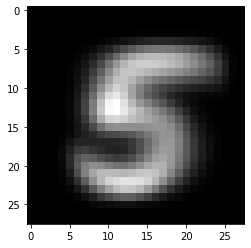

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import time

  
t1 = time.time()
meanImage = np.mean(fiverr,axis=0)

print("Mean image of 5s of shape{}".format(meanImage.shape))
plt.imshow(meanImage,cmap="gray")

## these dimensions would be used later in the notebook
nos,rows,cols = fiverr.shape
no2,ro2,co2 = test.shape



#**Question 2.a (Continuation)** 

*   Displaying the first 2
principal components (associated with the highest eigenvalues) along with their scatter plot


#**Question 2.b**

Displaying the reconstructions of a test image of Number 5 using:

1.   The mean image
2.   Prinicipal components p=10
3.   Prinicipal components p=50




      Prinicipal components 1  Prinicipal components 2
0                  181.650479              -538.978941
1                -1057.195517               921.089246
2                 -976.890721               401.087959
3                 -963.077415              -362.272884
4                 -995.773297               967.713728
...                       ...                      ...
5416              -959.804391               746.763339
5417             -1098.071985               446.809356
5418              -482.491361                95.437836
5419              -667.156867               244.223220
5420                72.791920              -583.310529

[5421 rows x 2 columns]


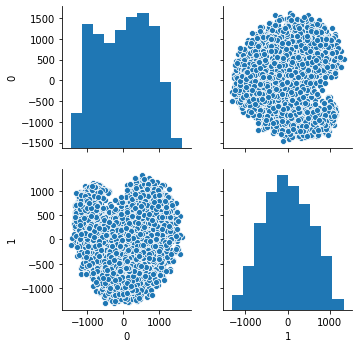

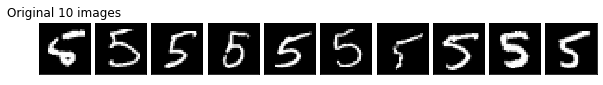

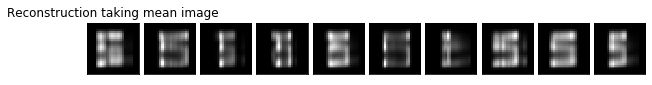

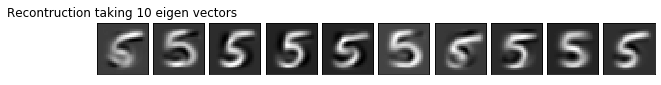

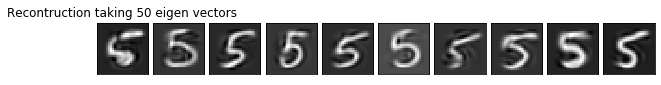

In [48]:
from sklearn.decomposition import PCA
import pandas as pd

matrix = np.zeros((nos,(rows*cols)))
test_matrix = np.zeros((no2,(ro2*co2)))
for i in range(len(fiverr)):
  matrix[i] = fiverr[i].flatten()
for i in range(len(test)):
  test_matrix[i] = test[i].flatten()

#print("shapes",matrix.shape,test_matrix.shape)
pca = PCA(n_components=2)
pca.fit(matrix)
components = pca.transform(matrix)
projected_train = pca.inverse_transform(components)
sns.pairplot(pd.DataFrame(components),kind='scatter')

#print("principal components",components.shape)
## displaying the Principal components
print(pd.DataFrame(components,columns=["Prinicipal components 1","Prinicipal components 2"]))



## Original Images
fig, axes = plt.subplots(1,10,figsize=(10,10),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Original 10 images")
for i, ax in enumerate(axes.flat):
    ax.imshow(test[i].reshape(rows,cols),cmap="gray")

## reconstruction using mean image
fig, axes = plt.subplots(1,10,figsize=(10,10),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Reconstruction taking mean image")
for i, ax in enumerate(axes.flat):
    ax.imshow(np.matmul(meanImage,test[i]),cmap="gray")


## 10 components
pca = PCA(n_components=10)
pca.fit(matrix)
components = pca.transform(test_matrix)
#print("componenets",components.shape)
projected = pca.inverse_transform(components)

fig, axes = plt.subplots(1,10,figsize=(10,10),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Recontruction taking 10 eigen vectors")
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(rows,cols),cmap="gray")

## 50 components
pca = PCA(n_components=50)
pca.fit(matrix)
components = pca.transform(test_matrix)
projected = pca.inverse_transform(components)

fig, axes = plt.subplots(1,10,figsize=(10,10),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Recontruction taking 50 eigen vectors")
for i, ax in enumerate(axes.flat):
    ax.imshow(projected[i].reshape(rows,cols),cmap="gray")




#**Question 2.c**

Trying to compute the Raw image for SSD (using the projected_train image computed from PCA.decomposition in the previous block)



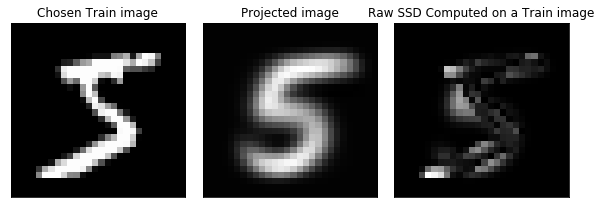

In [49]:
#SSD

a = fiverr[0]
b = projected_train[0].reshape(rows,cols)
ssd = (a-b)**2

fig,axes = plt.subplots(1,3,figsize=(10,20),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Chosen Train image")
axes[0].imshow(a,cmap="gray")
axes[1].set_title("Projected image")
axes[1].imshow(b,cmap="gray")
axes[2].set_title("Raw SSD Computed on a Train image")
axes[2].imshow(ssd,cmap="gray")
fig.show()

# **Question 2.c**

Trying to compute the raw DFFS image from a newly computed projection image and setting the n=5 components

(784,)
ordered value shape,vector shape (784,) (784, 784)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: ComplexWarning: Casting complex values to real discards the imaginary part


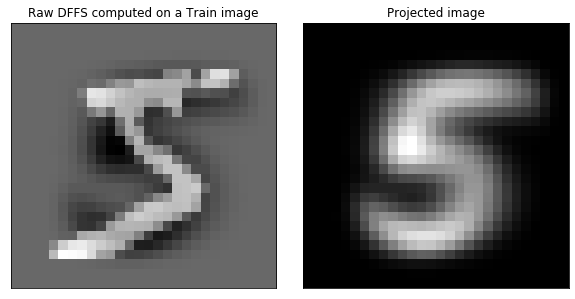

In [50]:
#calculating eigen vectors and eigen values
def pca(matrix):
  nos,rows,cols = matrix.shape
  comb = np.zeros((nos,(rows*cols)))
  Xmean = np.mean(matrix,axis=0).flatten()

  for i,X in enumerate(matrix):
    X = X.flatten()
    X = X - Xmean
    comb[i,:] = X
    if i == 1:
      print(X.shape)

  #print("Seconds of loop execution",time.time()-t1)
  #print("comb shape",comb.shape)

  # Covariance
  cov = np.cov(comb.T)
  C = np.dot(comb.T,comb)/nos
  #print("cov",cov.shape,cov[1][1])
  #print("C",C.shape,C[1][1])
  # Eigen values
  val, vec = np.linalg.eig(cov)
  #print("Seconds of eigen execution",time.time()-t1)

  print("ordered value shape,vector shape",(val.shape),vec.shape)
  order = val.argsort()
  val = val[order]
  vec = vec[:,order]

  PC = np.dot(comb,vec)
  return PC,val,vec

t1=time.time()
PC,val,vec= pca(fiverr)

## Choosing N components for feature space
nComp = 5
projected = meanImage#np.array(((rows*cols),1))
for i in range(nComp):
  add = np.multiply(val[i].astype(float),vec[:,i].reshape(rows,cols).astype(float))
  projected+=add
## DFFS
chosenImage = fiverr[0]
dffs = chosenImage - projected.reshape(rows,cols)

fig,axes = plt.subplots(1,2,figsize=(10,20),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
axes[0].set_title("Raw DFFS computed on a Train image")
axes[0].imshow(dffs,cmap="gray")
axes[1].set_title("Projected image")
axes[1].imshow(projected,cmap="gray")
fig.show()

# **Question 2.c**

The function Sliding window gives you a heatmap of DFFS and SSD using the eigen values computd in the previous code block on the composite image
you should choose the variables :


*   no_of_rows
*   no_of_cols

in the sliding_window function if you wish to use any other composite image

# **Question 2.d**

The Evaluation is done based on the different image processing techniques
1. I have used threshold function to convert the images into a binary images so that the difference is more pronounced

SSD seems to have identified the no 5 better but it fails to do so in 3rd and 4th row whereas the DFFS has better overall result the to identify Number5 

transformed Shape 196 280


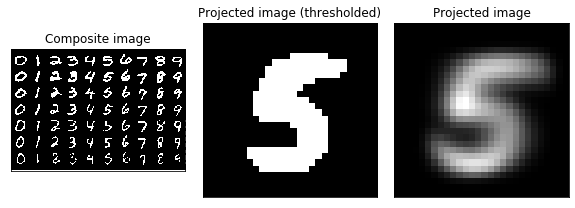

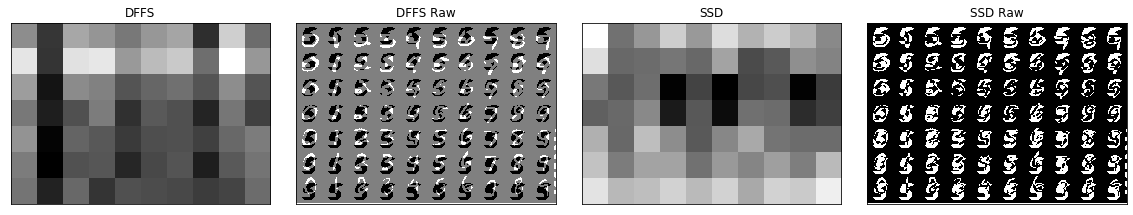

In [51]:
composite = cv2.imread("/content/composite.png",0)

def sliding_window(composite,projected):
  no_of_rows = 7  #no of rows in composite image
  no_of_cols = 10  #no of cols in composite image
  
  composite = cv2.resize(composite,(cols*no_of_cols,rows*no_of_rows,))
  composite = cv2.threshold(composite,127,255,cv2.THRESH_BINARY)[1]

  height,width = composite.shape
  dffs = np.ones((height,width))
  ssd = np.ones((height,width))
  dffs_raw = np.zeros((height,width))
  ssd_raw = np.zeros((height,width))

  proj = cv2.threshold(projected.reshape(rows,cols),70,255,cv2.THRESH_BINARY)[1]
  #proj = projected.reshape(rows,cols)
  print("transformed Shape",height,width)

  for h in range(0,height,rows):
    for w in range(0,width,cols):
      dffs[h:h+rows,w:w+cols] *= np.sum(composite[h:h+rows,w:w+cols] - proj)
      dffs_raw[h:h+rows,w:w+cols] = (composite[h:h+rows,w:w+cols] - proj)
      ssd[h:h+rows,w:w+cols] *= np.sum((composite[h:h+rows,w:w+cols] - proj)**2)
      ssd_raw[h:h+rows,w:w+cols] = (composite[h:h+rows,w:w+cols] - proj)**2

  fig,axes = plt.subplots(1,3,figsize=(10,20),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
  axes[0].set_title("Composite image")
  axes[0].imshow(composite,cmap="gray")
  axes[1].set_title("Projected image (thresholded)")
  axes[1].imshow(proj,cmap="gray")
  axes[2].set_title("Projected image")
  axes[2].imshow(projected.reshape(rows,cols),cmap="gray")

  return dffs,dffs_raw,ssd,ssd_raw

final = sliding_window(composite,projected)
final_labels = ["DFFS","DFFS Raw","SSD","SSD Raw"]
fig, axes = plt.subplots(1,4,figsize=(20,40),subplot_kw = {'xticks':[],'yticks':[]},gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i,ax in enumerate(axes):
  ax.set_title(final_labels[i])
  ax.imshow(final[i],cmap="gray")